-----

# **BrainStation Bootcamp:**
### **Book Recommendation System - EDA**
* Author: Rurick Alejandro Granados Figueredo
* Contact: rurickgrfi@gmail.com
* Date: July 31, 2023
-----------

## **Introduction**

By performing this Exploratory Data Analysis (EDA), we will gain valuable insights through an examination of the books' rating distribution, sentiment analysis, and overall data visualization. Throughout this analysis, we will conduct a thorough exploration of the dataset, allowing us to extract meaningful and actionable information. The knowledge gained will be instrumental in guiding the process throughout the development of the recommendation system.

---


## **Table of Contents** 
---
- [1. Loading Data and Libraries Setup](#_1)  
- [2. Exploratory Data Analysis (EDA)](#_2)
    - [2.1 Books Ratings Distribution](#_2.1)
    - [2.2 Sentiment Analysis](#_2.2)
    - [2.3 Data Visualizations](#_2.3)


-----

## 1. Loading Data and Libraries Setup <a class="anchor" id="_1"></a>

In [60]:
# Import libraries needed for the project
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the pickled DataFrame
book_rating = pd.read_pickle('/Users/rurickgranados/Desktop/Capstone.nosync/book_rating.pkl')

## 2. Exploratory Data Analysis (EDA) <a class="anchor" id="_2"></a>

In [40]:
book_rating.sample(1)

,BookTitle,Book_Description,Book_Category,Published_Date,Main_Author,RatingID,UserID,Review_Score,Review_Summary,Review_Text,Review_Counts,Average_Rating
320921,Emma,"The culmination of Jane Austen's genius, a spa...",FICTION,2015,Jane Austen,1581730470,A2G5LI7C5AZ0D6,5.0,A Genuine Experience... Wholesome and Funny.,"I admit, it has been a few years since I read ...",1639,4.257107


### 2.1 Books Ratings Distribution <a class="anchor" id="_2.1"></a>

In [41]:
#  Count the Review_Score for each book
book_rating.Review_Score.value_counts().sort_index()


Review_Score
1.0     111596
2.0      89367
3.0     156545
4.0     359975
5.0    1070867
Name: count, dtype: int64

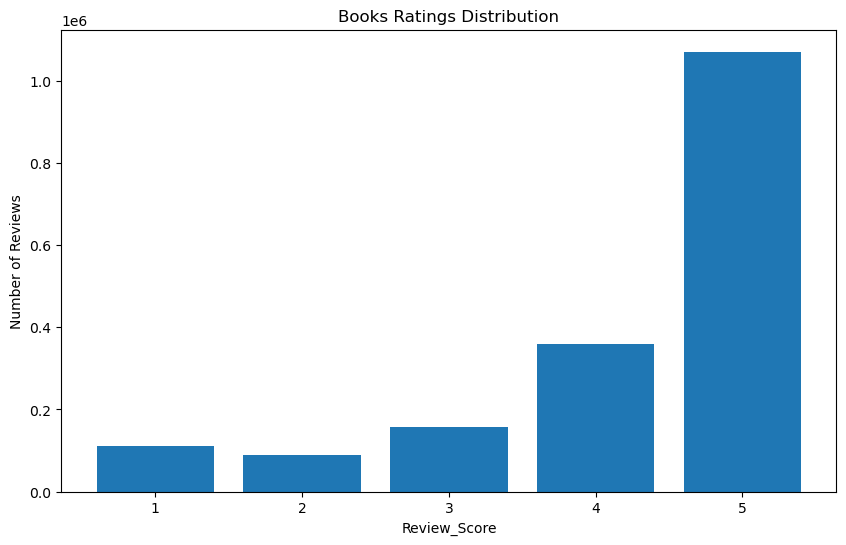

In [42]:
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
review_counts = [111596, 89367, 156545, 359975, 1070867]

plt.figure(figsize=(10, 6))
plt.bar(ratings, review_counts)
plt.title('Books Ratings Distribution')
plt.xlabel('Review_Score')
plt.ylabel('Number of Reviews')
plt.show()

### 2.2 Sentiment Analysis <a class="anchor" id="_2.2"></a>

A new `Sentiment` column will be breated based on the `Review_Score` where 0, 1, 2 and 3 will count as 0 (bad), and 4, 5 will count as 1 (good).

In [43]:
book_rating["Sentiment"] = np.where(book_rating['Review_Score'] >= 4, 1, 0)
book_rating["Sentiment"].value_counts()

Sentiment
1    1430842
0     357508
Name: count, dtype: int64

In [44]:
book_rating.sample(3)

,BookTitle,Book_Description,Book_Category,Published_Date,Main_Author,RatingID,UserID,Review_Score,Review_Summary,Review_Text,Review_Counts,Average_Rating,Sentiment
111193,Java Servlet & JSP Cookbook,Servlets are an exciting and important technol...,Computers,2001-04-03,Jason Hunter,0596005725,A13PCYS7GR54P1,5.0,Precisely the book I've been dreaming of...,This book is exactly what it claims to be: a g...,8,3.750000,1
176693,The Giver,Given his lifetime assignment at the Ceremony ...,Juvenile Fiction,2014-07-01,Lois Lowry,B000P1QRII,A3P3U42S4A2YHQ,5.0,Absolutely stunning,I am sad to say that I have never read this bo...,3834,4.344322,1
276087,Love Must be Tough,You've forgiven a thousand times. You've bent ...,Religion,2010-12-22,James C. Dobson,0394298594,AAQCC77OU870O,1.0,not worth it,I bought this book while my wife was having a ...,88,4.431818,0


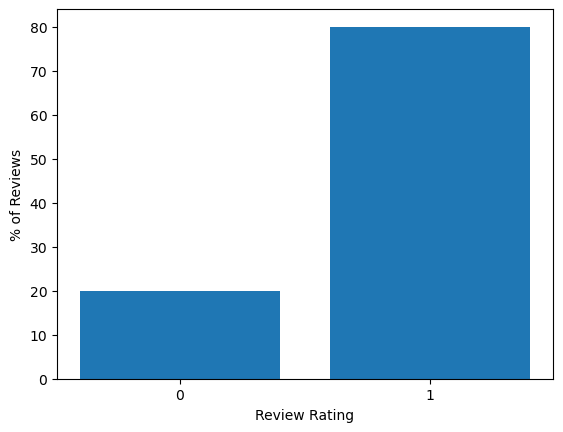

Class imbalance: [0.2 0.8]


In [45]:
values, counts = np.unique(book_rating['Sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [46]:
# Splitting the DataFrame into negative and positive DataFrames
negative = book_rating[book_rating['Sentiment'] == 0]
positive = book_rating[book_rating['Sentiment'] == 1]

# Dropping the not required columns 
negative = negative.drop(["BookTitle","Book_Description","Book_Category","Published_Date","Main_Author","RatingID","UserID","Review_Score","Review_Text","Review_Counts","Average_Rating","Sentiment"], axis=1)
positive = positive.drop(["BookTitle","Book_Description","Book_Category","Published_Date","Main_Author","RatingID","UserID","Review_Score","Review_Text","Review_Counts","Average_Rating","Sentiment"], axis=1)

In [47]:
positive.sample(1)

,Review_Summary
1248104,"In my heart, I believe Pern is a real place."


In [48]:
negative.sample(1)

,Review_Summary
178442,Don't read it if you don't have to


In [49]:
import nltk
import string
stemmer = nltk.stem.PorterStemmer()

nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rurickgranados/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Positive Reviews:

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Positive bag-of-words  
bagofwords_positive = CountVectorizer(tokenizer=my_tokenizer, min_df=50, max_features=3000).fit(positive['Review_Summary'])
positive_transformed = bagofwords_positive.transform(positive['Review_Summary'])

# Display the sparse matrix of the Positive bag-of-words
positive_words = pd.DataFrame(columns=bagofwords_positive.get_feature_names_out(), data=positive_transformed.toarray())
display(positive_words)

/Users/rurickgranados/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,1,10,100,1000,101,11,12,13,14,15,...,young,younger,your,youth,youv,yr,yummi,zane,zen,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Top 20 positive tokens
p_token= positive_words.sum()
top_20_p_tokens = p_token.nlargest(20)
top_20_p_tokens


book       223844
great      132993
read       116189
good        73630
best        53504
excel       47592
love        46384
classic     42508
stori       41356
one         40163
wonder      28588
must        23398
novel       22571
review      21160
time        20643
ever        20257
life        19433
favorit     16952
amaz        16097
beauti      16046
dtype: int64

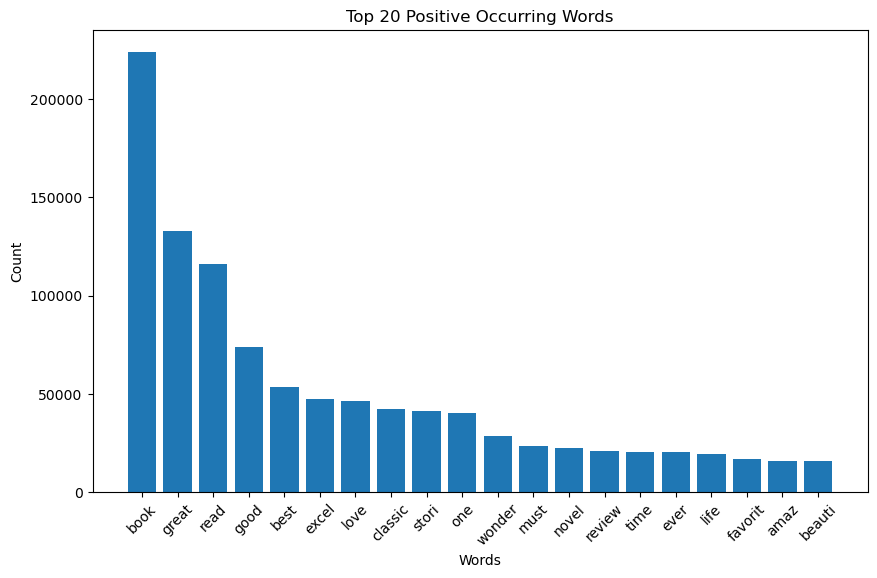

In [52]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_p_tokens.index, top_20_p_tokens.values)
plt.title('Top 20 Positive Occurring Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Negative Reviews:

In [53]:

# Negative bag-of-words 
bagofwords_negative = CountVectorizer(tokenizer=my_tokenizer, min_df=50, max_features=3000).fit(negative['Review_Summary'])
negative_transformed = bagofwords_negative.transform(negative['Review_Summary'])

# Display the sparse matrix of the Negative bag-of-words
negative_words = pd.DataFrame(columns=bagofwords_negative.get_feature_names_out(), data=negative_transformed.toarray())
display(negative_words)

/Users/rurickgranados/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,0,1,10,100,1000,101,12,13,14,15,...,youd,youll,young,younger,your,youth,youv,yuck,zen,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Top 20 negative tokens
n_token= negative_words.sum()
top_20_n_tokens = n_token.nlargest(20)
top_20_n_tokens

book          37453
good          23072
read          17757
disappoint    13224
great         10544
stori          7969
bad            6801
interest       6573
dont           6372
one            6299
bore           6236
time           5875
better         5682
review         5568
like           5339
best           5174
much           4869
edit           4687
get            4459
ok             4155
dtype: int64

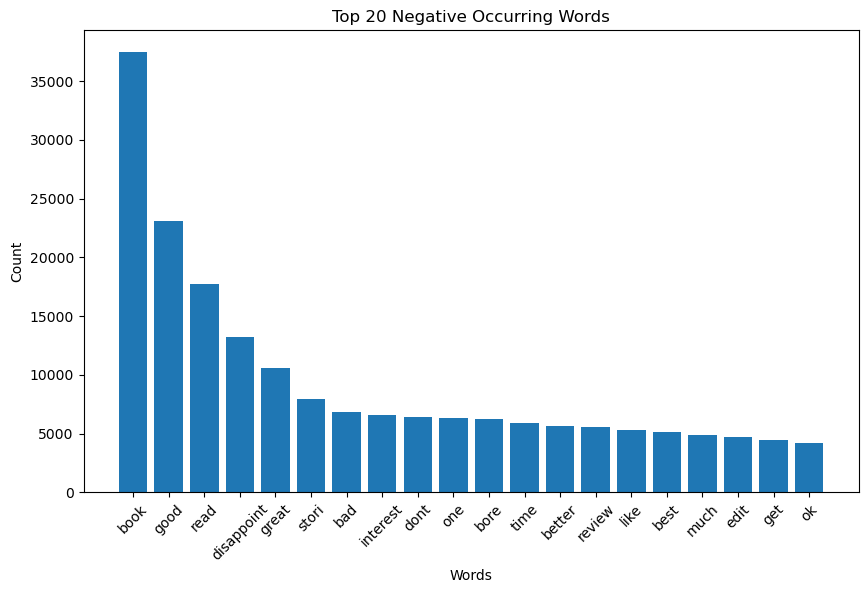

In [55]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_n_tokens.index, top_20_n_tokens.values)
plt.title('Top 20 Negative Occurring Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 2.3 Data Visualizations <a class="anchor" id="_2.3"></a>

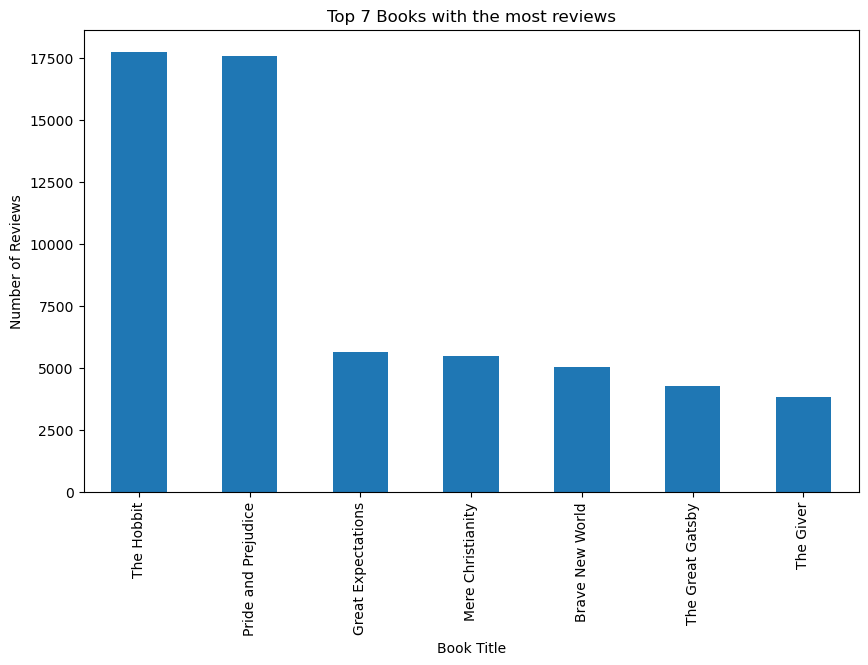

In [56]:
# Plot the number of reviews per book
plt.figure(figsize=(10,6))
book_rating.groupby('BookTitle')['UserID'].count().sort_values(ascending=False).head(7).plot(kind='bar')
plt.title('Top 7 Books with the most reviews')
plt.xlabel('Book Title')
plt.ylabel('Number of Reviews')
plt.show()

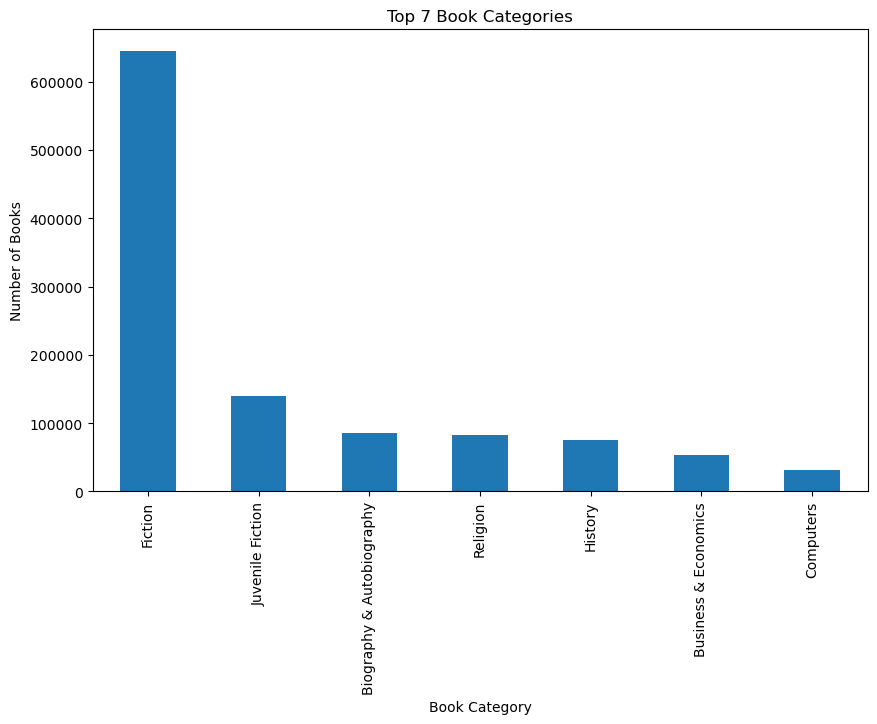

In [57]:
#plot the top 7 categories
plt.figure(figsize=(10,6))
book_rating["Book_Category"].value_counts()[:7].plot(kind='bar')
plt.title("Top 7 Book Categories")
plt.xlabel("Book Category")
plt.ylabel("Number of Books")
plt.show()


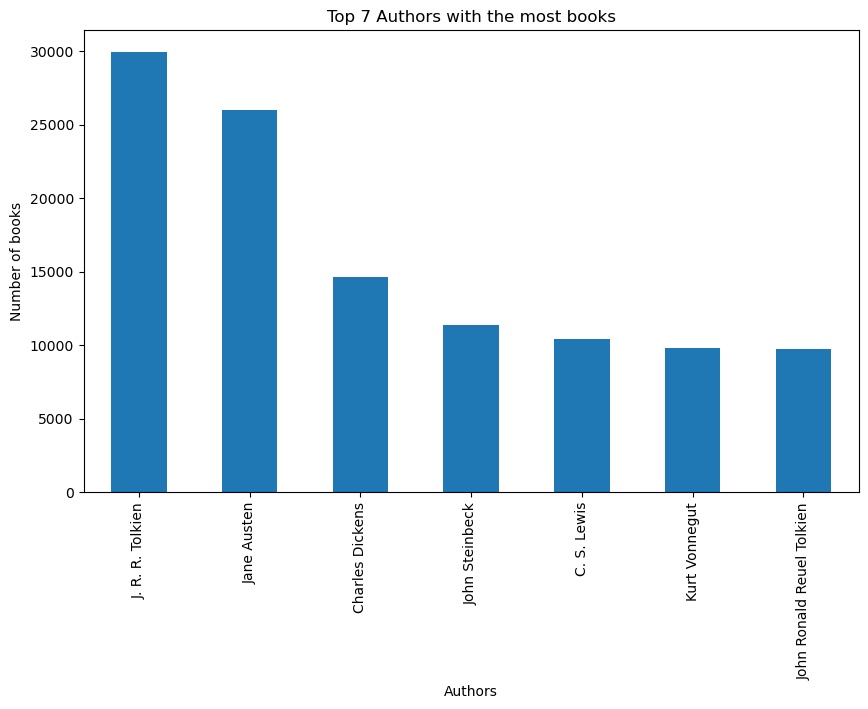

In [58]:
# plot the top 7 authors with the most books
plt.figure(figsize=(10,6))
book_rating["Main_Author"].value_counts().head(7).plot(kind="bar")
plt.title("Top 7 Authors with the most books")
plt.xlabel("Authors")
plt.ylabel("Number of books")
plt.show()